In [21]:
# LEVANTAMOS LAS BASES DE LOS CUATRO TRIMESTRES DE VIAJES PRESTADOS POR LINEA#
from google.colab import drive
drive.mount('/content/drive/', force_remount=True )
import pandas as pd
#%cd /content/drive/My Drive/bases_mentoria/
#path= '/content/drive/My Drive/bases_mentoria/primer trimestre 2019'
path= '/content/drive/My Drive/Tarjetas prestadas por hora'
import glob
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename, encoding='latin-1', sep=","))

# Concatenate all data into one DataFrame
big_frame = pd.concat(dfs, ignore_index=True)

big_frame.head()

Mounted at /content/drive/


,CANT_VIAJES_S_DUPL,CANT_VIAJES_TOT,Porc_tarj_prestadas,hora
0,25979,30282,0.142098,0
1,10126,11740,0.137479,1
2,70216,80206,0.124554,23
3,5826,6613,0.119008,2
4,144783,162163,0.107176,22


In [22]:
del big_frame['Porc_tarj_prestadas']

In [23]:
big_frame.sort_values('hora')

,CANT_VIAJES_S_DUPL,CANT_VIAJES_TOT,hora
0,25979,30282,0
24,27112,32322,0
73,27150,31085,0
48,27620,31994,0
1,10126,11740,1
...,...,...,...
4,144783,162163,22
74,73320,82642,23
26,67255,78627,23
50,76097,86232,23


In [24]:
viajes_compartidos_por_hora=big_frame.groupby('hora').sum()

In [25]:
viajes_compartidos_por_hora.head(24)

,CANT_VIAJES_S_DUPL,CANT_VIAJES_TOT
hora,,
0,107861,125683
1,37352,43477
2,20475,23206
3,43985,47323
4,420276,436933
5,1797767,1865891
6,4513946,4692340
7,3903663,4103797
8,2639760,2831603


In [26]:
viajes_compartidos_por_hora['hora']=viajes_compartidos_por_hora.index

In [27]:
viajes_compartidos_por_hora['Porc_compartidos']= (1 - (viajes_compartidos_por_hora.CANT_VIAJES_S_DUPL/viajes_compartidos_por_hora.CANT_VIAJES_TOT)) * 100

In [28]:
#viajes_compartidos_por_hora= viajes_compartidos_por_hora.sort_values(by='hora', ascending=False)

In [29]:
viajes_compartidos_por_hora.head(10)

,CANT_VIAJES_S_DUPL,CANT_VIAJES_TOT,hora,Porc_compartidos
hora,,,,
0,107861,125683,0,14.180120
1,37352,43477,1,14.087909
2,20475,23206,2,11.768508
3,43985,47323,3,7.053653
4,420276,436933,4,3.812255
5,1797767,1865891,5,3.651017
6,4513946,4692340,6,3.801813
7,3903663,4103797,7,4.876801
8,2639760,2831603,8,6.775067


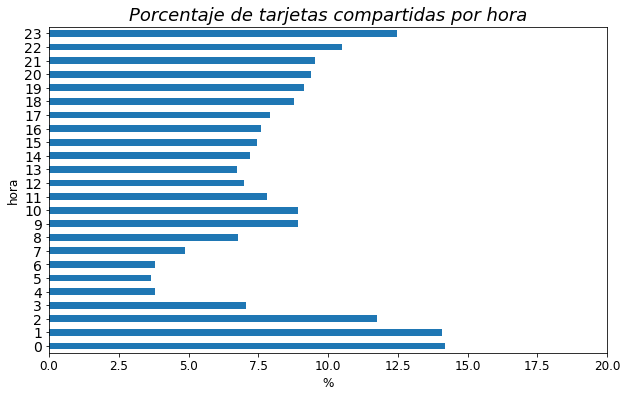

In [30]:
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
ax = viajes_compartidos_por_hora.Porc_compartidos.plot.barh(rot=0)
plt.title('Porcentaje de tarjetas compartidas por hora', fontsize=18,fontstyle='italic')
plt.xlabel('%', fontsize=12)
plt.ylabel('hora', fontsize=12)
#plt.legend('Primer trimestre de 2019')
ax.set_xlim(0, 20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.show()
##Ya lo hicimos por LINEA, hacer lo mismo por horas del dia y por dia de la semana##